# Figure 3: Forelimb movement behavior in a primate

#### import plot and data loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_hdf("../data/Figure3.h5")

## Figure 3a

- Behavioral setup: monkey makes either active movements in 8 directions with the manipulandum, or the arm is passively moved via the manipulandum (real behavioral trajectories shown, with cartoon depicting the task setup). Behavior and neural recordings are from area 2 of the primary somatosensory cortex from Chowdhury et al.

(-7.249750447273255, 6.267432045936585, -4.10022519826889, 3.132592189311981)

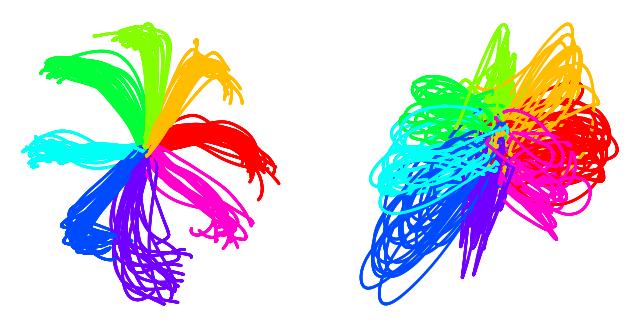

In [3]:
active = data["behavior"]["active"]
active_target = data["behavior"]["active_target"]

passive = data["behavior"]["passive"]
passive_target = data["behavior"]["passive_target"]

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax1.scatter(active[:, 0], active[:, 1], color=plt.cm.hsv(1 / 8 * active_target), s=1)
ax1.axis("off")

ax2 = plt.subplot(122)
ax2.scatter(passive[:, 0], passive[:, 1], color=plt.cm.hsv(1 / 8 * passive_target), s=1)
ax2.axis("off")

## Figure 3b

- Comparison of embeddings of active trials generated with CEBRA-Behavior, CEBRA-Time, conv-pi-VAE variants, tSNE, and UMAP. The embeddings of trials (n=364) of each direction are post-hoc averaged.

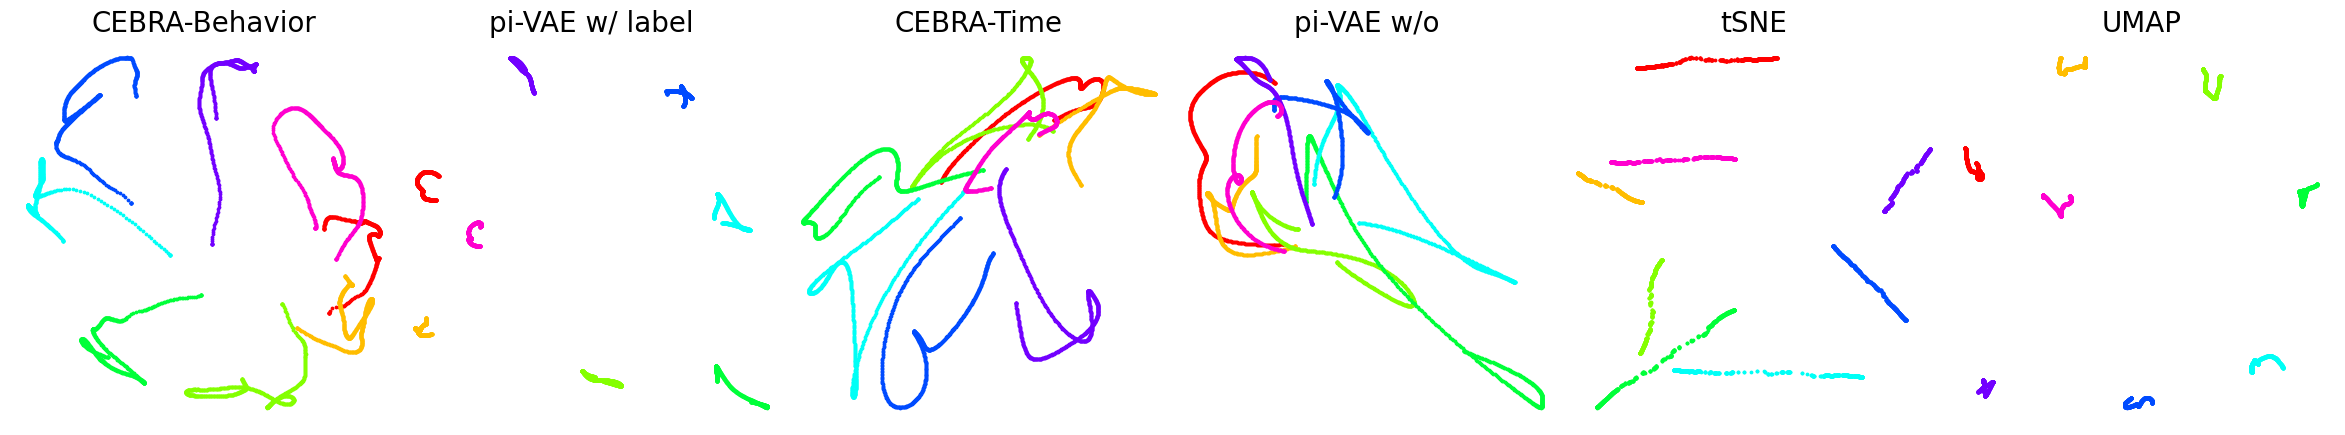

In [4]:
overview = data["overview"]
fig = plt.figure(figsize=(30, 5))
plt.subplots_adjust(wspace=0, hspace=0)
emissions_list = [
    overview["cebra-behavior"],
    overview["pivae_w"],
    overview["cebra-time"],
    overview["pivae_wo"],
    overview["tsne"],
    overview["umap"],
]
labels = overview["label"]
for j in range(6):
    if j == 0:
        idx1, idx2 = (2, 0)
        ax = fig.add_subplot(1, 6, j + 1)
    elif j == 1 or j == 3:
        idx1, idx2 = (2, 3)
        ax = fig.add_subplot(1, 6, j + 1)
    elif j == 4 or j == 5:
        idx1, idx2 = (0, 1)
        ax = fig.add_subplot(1, 6, j + 1)
    else:
        idx1, idx2 = (0, 1)
        ax = fig.add_subplot(1, 6, j + 1)
    if j == 0:
        trials = emissions_list[j].reshape(-1, 600, 4)
        trials_labels = labels.reshape(-1, 600)[:, 1]
        mean_trials = []
        for i in range(8):
            mean_trial = trials[trials_labels == i].mean(axis=0)
            mean_trials.append(mean_trial)
        for trial, label in zip(mean_trials, np.arange(8)):
            ax.scatter(
                trial[:, idx1], trial[:, idx2], color=plt.cm.hsv(1 / 8 * label), s=3
            )
    elif j == 1:
        trials = emissions_list[j].reshape(-1, 600, 4)
        trials_labels = labels.reshape(-1, 600)[:, 1]
        mean_trials = []
        for i in range(8):
            mean_trial = trials[trials_labels == i].mean(axis=0)
            mean_trials.append(mean_trial)
        for trial, label in zip(mean_trials, np.arange(8)):
            ax.scatter(
                trial[:, idx1], trial[:, idx2], color=plt.cm.hsv(1 / 8 * label), s=3
            )
    else:
        trials = emissions_list[j].reshape(-1, 600, emissions_list[j].shape[-1])
        trials_labels = labels.reshape(-1, 600)[:, 1]
        mean_trials = []
        for i in range(8):
            mean_trial = trials[trials_labels == i].mean(axis=0)
            mean_trials.append(mean_trial)
        for trial, label in zip(mean_trials, np.arange(8)):
            ax.scatter(
                trial[:, idx1], trial[:, idx2], color=plt.cm.hsv(1 / 8 * label), s=3
            )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(
        [
            "CEBRA-Behavior",
            "pi-VAE w/ label",
            "CEBRA-Time",
            "pi-VAE w/o",
            "tSNE",
            "UMAP",
        ][j],
        fontsize=20,
    )

## Figure 3c

- CEBRA-Behavior trained with x,y position of the hand. Left panel is color-coded to x position and right panel is color-coded to y position.

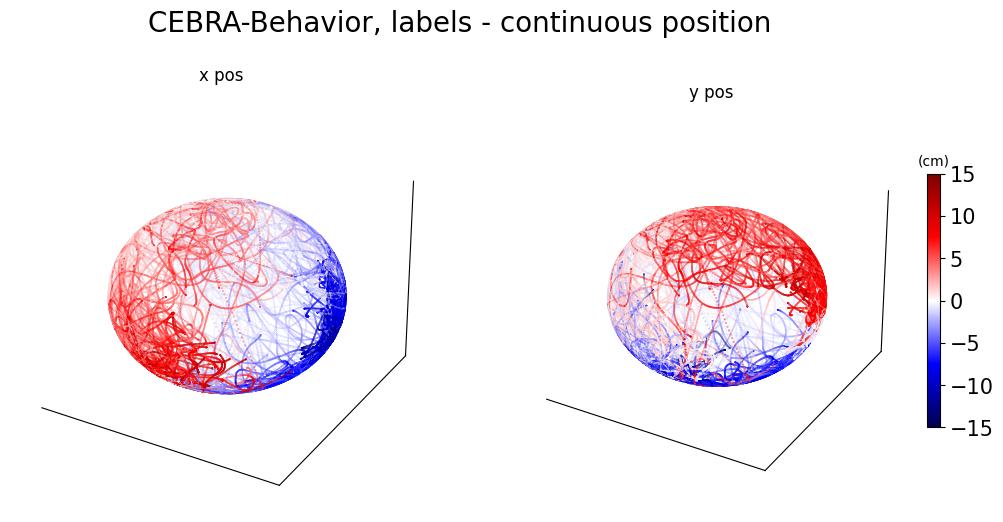

In [5]:
def set_pane_axis(ax):
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
    ax.yaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
    ax.zaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])


features_pos = data["behavior_time"]["behavior"]["embedding"]
labels_pos = data["behavior_time"]["behavior"]["label"]
dx1, idx2, idx3 = (0, 1, 2)
fig = plt.figure(figsize=(12, 6))
fig.suptitle("CEBRA-Behavior, labels - continuous position", fontsize=20)
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_title(f"x pos")
x = ax1.scatter(
    features_pos[:, idx1],
    features_pos[:, idx2],
    features_pos[:, idx3],
    cmap="seismic",
    c=labels_pos[:, 0],
    s=0.05,
    vmin=-15,
    vmax=15,
)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.set_title(f"y pos")
y = ax2.scatter(
    features_pos[:, idx1],
    features_pos[:, idx2],
    features_pos[:, idx3],
    cmap="seismic",
    c=labels_pos[:, 1],
    s=0.05,
    vmin=-15,
    vmax=15,
)
yc = plt.colorbar(y, fraction=0.03, pad=0.05, ticks=np.linspace(-15, 15, 7))
yc.ax.tick_params(labelsize=15)
yc.ax.set_title("(cm)", fontsize=10)
set_pane_axis(ax1)
set_pane_axis(ax2)

## Figure 3d

- CEBRA-Time without any external behavior variables. As in \textbf{c}, left and right are color-coded to x and y position, respectively.

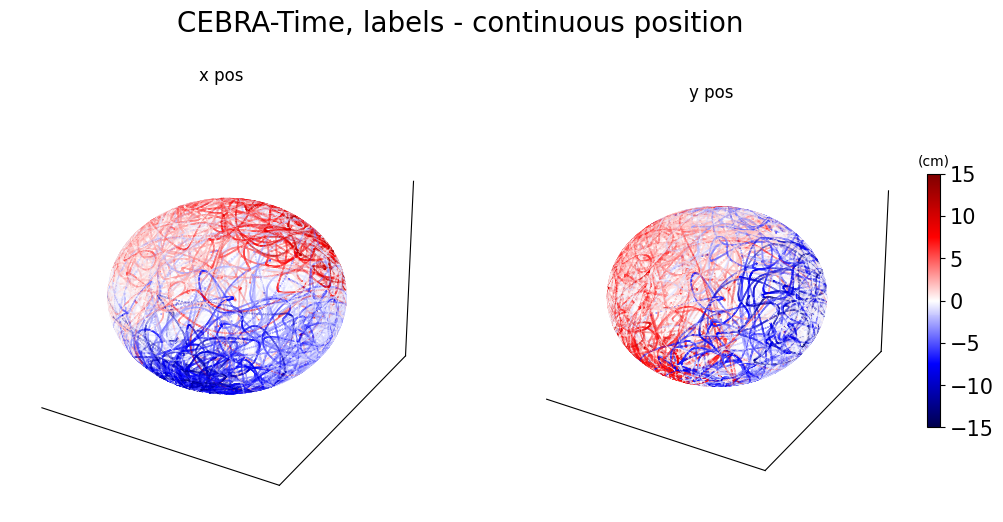

In [6]:
features_time = data["behavior_time"]["time"]["embedding"]
labels_time = data["behavior_time"]["time"]["label"]
idx1, idx2, idx3 = (0, 1, 2)
fig = plt.figure(figsize=(12, 6))
fig.suptitle("CEBRA-Time, labels - continuous position", fontsize=20)
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_title(f"x pos")
x = ax1.scatter(
    features_time[:, idx1],
    features_time[:, idx2],
    features_time[:, idx3],
    cmap="seismic",
    c=labels_time[:, 0],
    s=0.05,
    vmin=-15,
    vmax=15,
)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.set_title(f"y pos")
y = ax2.scatter(
    features_time[:, idx1],
    features_time[:, idx2],
    features_time[:, idx3],
    cmap="seismic",
    c=labels_time[:, 1],
    s=0.05,
    vmin=-15,
    vmax=15,
)
yc = plt.colorbar(y, fraction=0.03, pad=0.05, ticks=np.linspace(-15, 15, 7))
yc.ax.tick_params(labelsize=15)
yc.ax.set_title("(cm)", fontsize=10)
set_pane_axis(ax1)
set_pane_axis(ax2)

## Figure 3e

- Left, CEBRA-Behavior embedding trained with a 4D latent space, with target direction and active OR passive trials (trained separately) as behavior labels. Plotted separately, active vs. passive training condition.

Text(0.5, 0.92, 'Passive')

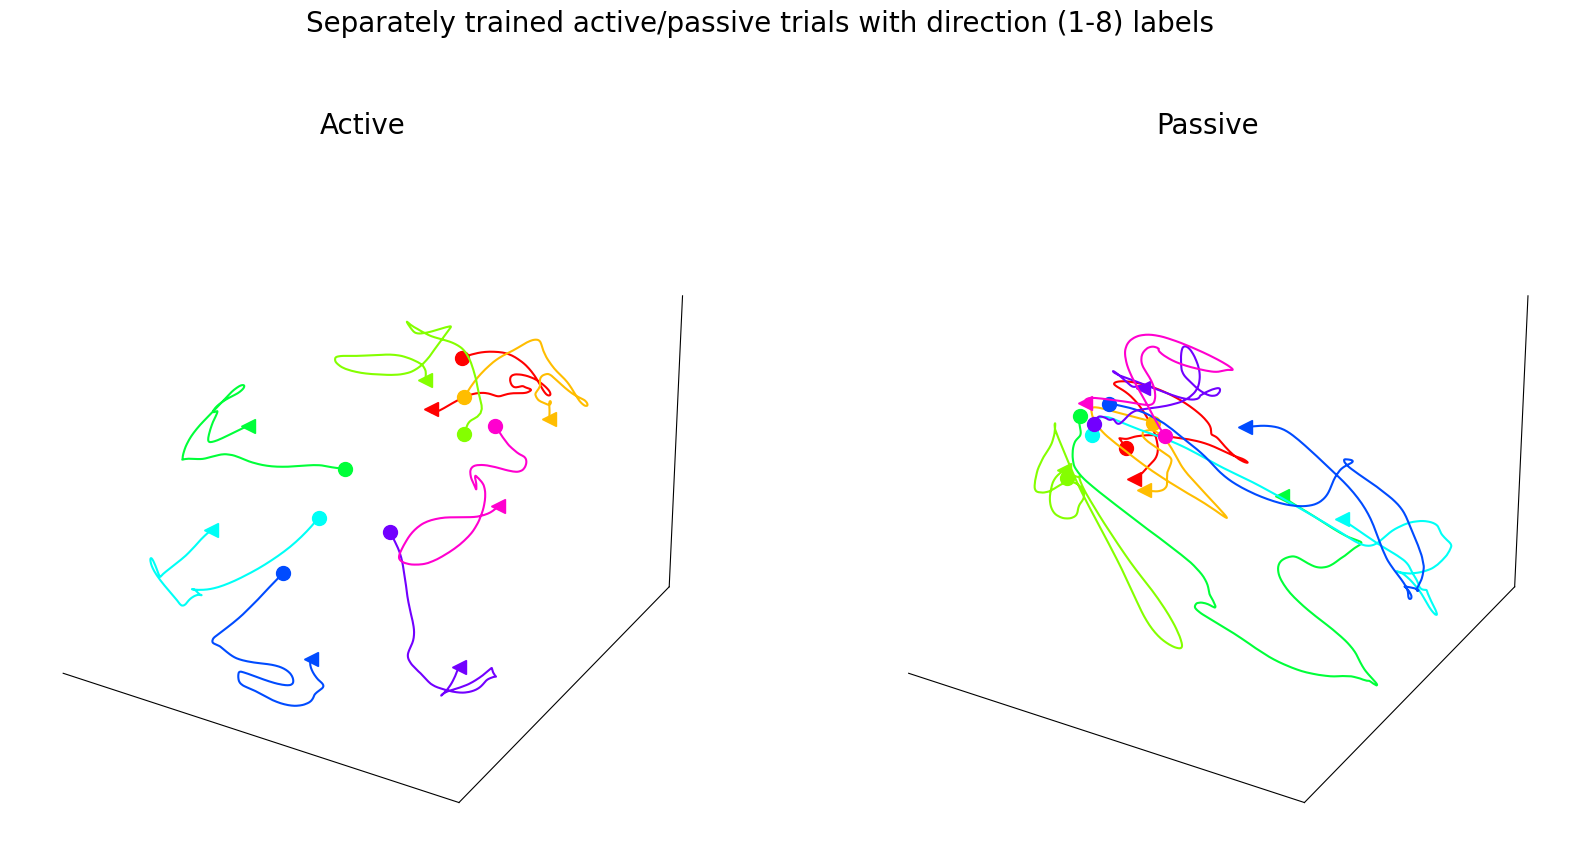

In [7]:
active_emission = data["cebra_ap_sep"]["active"]["embedding"]
active_label = data["cebra_ap_sep"]["active"]["label"]
passive_emission = data["cebra_ap_sep"]["passive"]["embedding"]
passive_label = data["cebra_ap_sep"]["passive"]["label"]
feature_num = active_emission.shape[-1]

fig = plt.figure(
    figsize=(20, 10),
)
fig.suptitle(
    "Separately trained active/passive trials with direction (1-8) labels", fontsize=20
)
idx1, idx2, idx3 = 1, 2, 0
active_trials_index = active_label

active_trials = active_emission.reshape(-1, 600, feature_num)
active_trials_labels = active_label.reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = active_trials[active_trials_labels == i].mean(
        axis=0
    ) / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0))
    mean_active_trials.append(mean_active_trial)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
for trial, label in zip(mean_active_trials, np.arange(8)):
    ax1.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax1.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax1.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax1)
ax1.set_title("Active", fontsize=20)


passive_trials_index = passive_label
passive_trials = passive_emission.reshape(-1, 600, feature_num)
passive_trials_labels = passive_label.reshape(-1, 600)[:, 0].squeeze()
mean_passive_trials = []

for i in range(8):
    mean_passive_trial = passive_trials[passive_trials_labels == i].mean(
        axis=0
    ) / np.linalg.norm(passive_trials[passive_trials_labels == i].mean(axis=0))
    mean_passive_trials.append(mean_passive_trial)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
for trial, label in zip(mean_passive_trials, np.arange(8)):
    ax2.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax2.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax2.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax2)
ax2.set_title("Passive", fontsize=20)

## Figure 3f

- Left, CEBRA-Behavior embedding trained with a 4D latent space, with target direction and active and passive trials as behavior labels, but plotted separately, active vs. passive trials.

Text(0.5, 0.92, 'Passive')

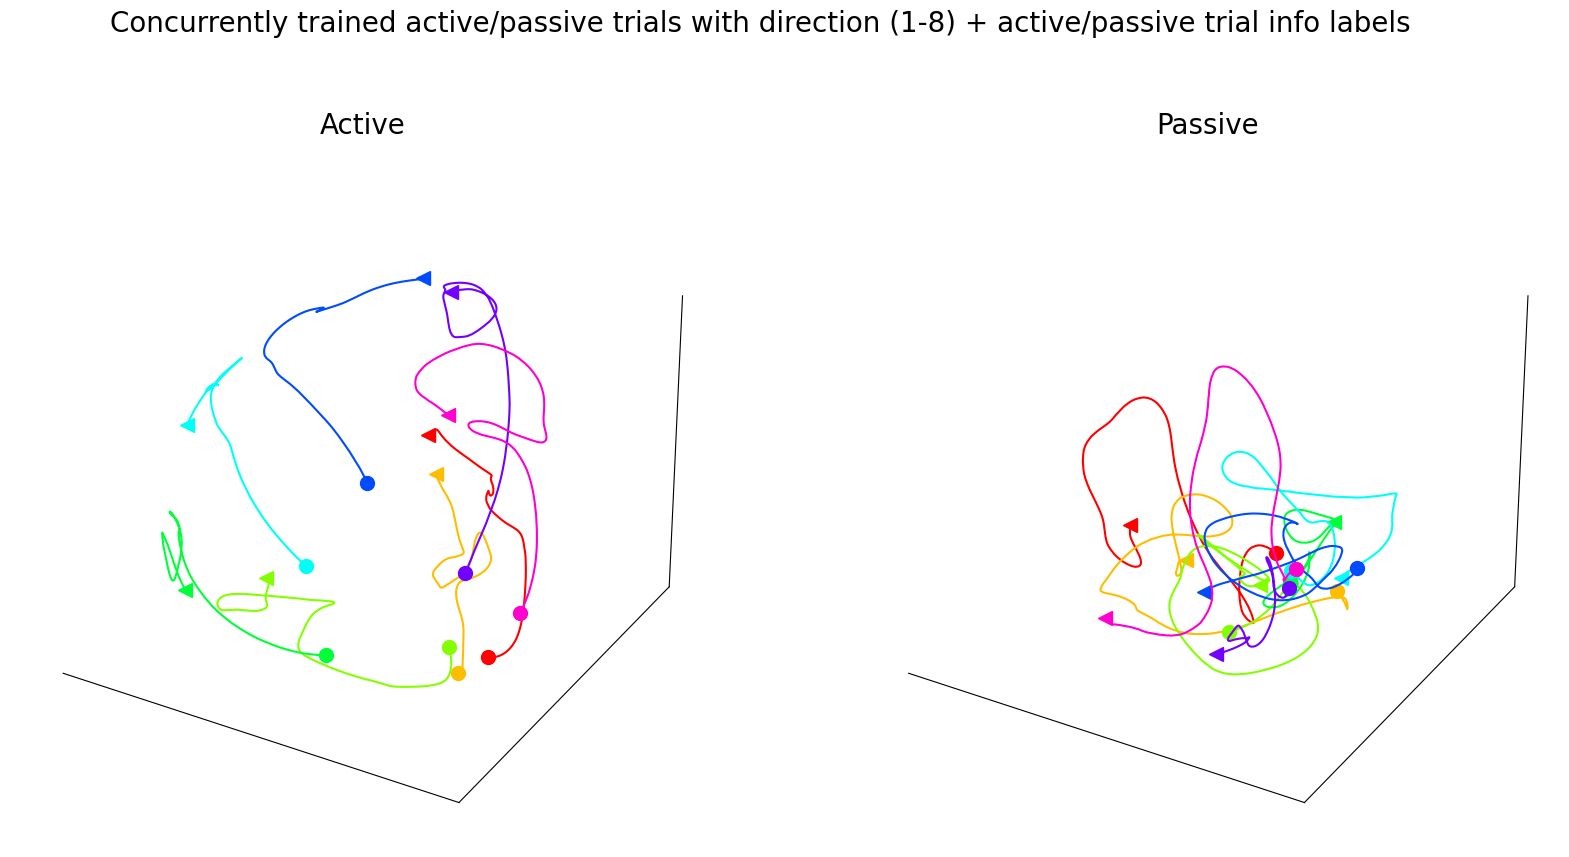

In [8]:
target_emission = data["cebra_ap_all"]["embedding"]
target_label = data["cebra_ap_all"]["label"]

fig = plt.figure(
    figsize=(20, 10),
)
fig.suptitle(
    "Concurrently trained active/passive trials with direction (1-8) + active/passive trial info labels",
    fontsize=20,
)
idx1, idx2, idx3 = 2, 0, 1
active_trials_index = target_label < 8
active_trials = target_emission[active_trials_index].reshape(-1, 600, feature_num)
active_trials_labels = (
    target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
for trial, label in zip(mean_active_trials, np.arange(8)):
    ax1.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax1.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax1.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax1)
ax1.set_title("Active", fontsize=20)

# ax3 = fig.add_subplot(2,2,3)
passive_trials_index = target_label >= 8
passive_trials = target_emission[passive_trials_index].reshape(-1, 600, feature_num)
passive_trials_labels = (
    target_label[passive_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_passive_trials = []

for i in range(8, 16):
    mean_passive_trial = (
        passive_trials[passive_trials_labels == i].mean(axis=0)
        / np.linalg.norm(
            passive_trials[passive_trials_labels == i].mean(axis=0), axis=1
        )[:, None]
    )
    mean_passive_trials.append(mean_passive_trial)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")

for trial, label in zip(mean_passive_trials, np.arange(8, 16)):
    ax2.plot(
        trial[:, idx1],
        trial[:, idx2],
        trial[:, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
    )
    ax2.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="o",
        markersize=10,
    )
    ax2.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax2)
ax2.set_title("Passive", fontsize=20)

## Figure 3g

- CEBRA-Behavior embedding trained with a 4D latent space using active and passive trials with continuous position as behavior labels, but post-hoc plotted separately, active vs. passive trials. The trajectory of each direction is averaged across trials (n=18--30 each, per directions) over time. Each trajectory represents 600ms from -100ms before the start of the movement.

Text(0.5, 0.92, 'Passive')

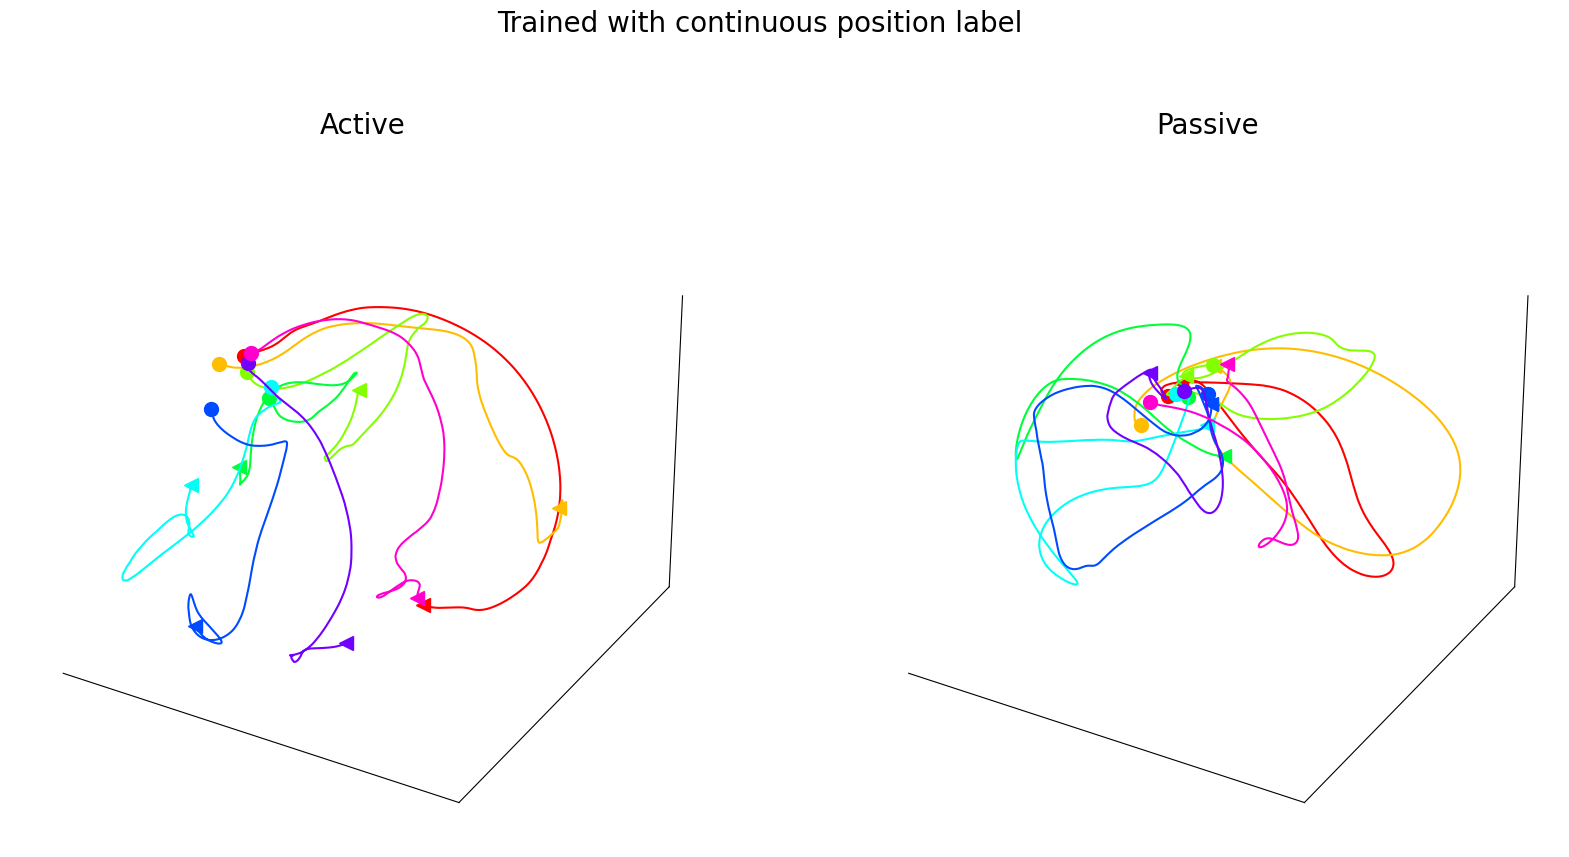

In [9]:
position_emission = data["cebra_pos"]["embedding"]

fig = plt.figure(
    figsize=(20, 10),
)
fig.suptitle("Trained with continuous position label", fontsize=20)

idx1, idx2, idx3 = 0, 1, 2
active_trials_index = target_label < 8

active_trials = position_emission[active_trials_index].reshape(-1, 600, feature_num)
ctive_trials_labels = target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
for trial, label in zip(mean_active_trials, np.arange(8)):
    ax1.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax1.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax1.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax1)
ax1.set_title("Active", fontsize=20)

passive_trials_index = target_label >= 8
passive_trials = position_emission[passive_trials_index].reshape(-1, 600, feature_num)
passive_trials_labels = (
    target_label[passive_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_passive_trials = []

for i in range(8, 16):
    mean_passive_trial = (
        passive_trials[passive_trials_labels == i].mean(axis=0)
        / np.linalg.norm(
            passive_trials[passive_trials_labels == i].mean(axis=0), axis=1
        )[:, None]
    )
    mean_passive_trials.append(mean_passive_trial)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")

for trial, label in zip(mean_passive_trials, np.arange(8, 16)):
    ax2.plot(
        trial[:, idx1],
        trial[:, idx2],
        trial[:, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
    )
    ax2.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="o",
        markersize=10,
    )
    ax2.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax2)
ax2.set_title("Passive", fontsize=20)

## Figure 3h

- Left to right: Decoding performance of: position using CEBRA-Behavior trained with x,y position (active trials); target direction using CEBRA-Behavior trained with target direction (active trials); or active vs. passive accuracy using CEBRA-Behavior trained with both active and passive movements. For each case, we trained and evaluated 5 seeds represented by black dot and the orange line represents median.

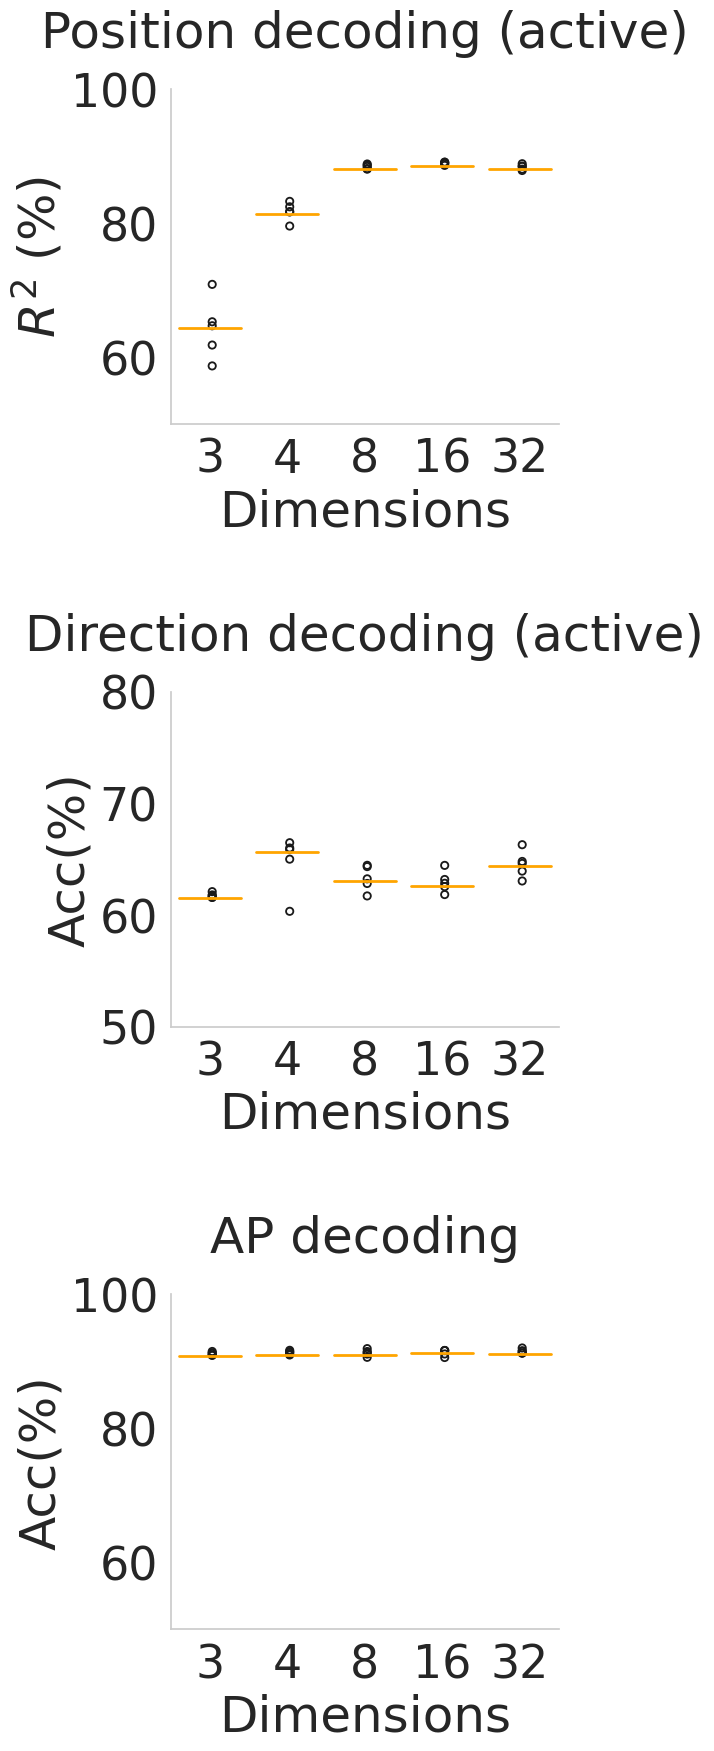

In [10]:
position_acc = data["condition_decoding"]["position"]
direction_acc = data["condition_decoding"]["direction"]
ap_acc = data["condition_decoding"]["ap"]

sns.set(font_scale=3)
sns.set_style(
    "whitegrid",
    {"axes.grid": False},
)
fig = plt.figure(figsize=(5, 20))
axs = fig.subplots(3, 1)
plt.subplots_adjust(hspace=0.8)
data_list = [position_acc, direction_acc, ap_acc]
title_list = [
    "Position decoding (active)",
    "Direction decoding (active)",
    "AP decoding",
]

units = ["$R^2$ (%)", "Acc(%)", "Acc(%)"]
ylims = [(50, 100), (50, 80), (50, 100)]
for i in range(3):
    m = 0
    ax = sns.stripplot(
        data=[data_list[i][n] for n in ["3", "4", "8", "16", "32"]],
        facecolor="none",
        color="k",
        marker="$\circ$",
        s=10,
        jitter=0,
        ax=axs[i],
    )
    sns.boxplot(
        showmeans=False,
        medianprops={"color": "orange", "ls": "-", "lw": 2},
        whiskerprops={"visible": False},
        zorder=10,
        data=[data_list[i][n] for n in ["3", "4", "8", "16", "32"]],
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=axs[i],
    )

    ax.set_xlabel("Dimensions")
    ax.set_ylim(ylims[i])
    ax.set_ylabel(units[i])
    ax.set_title(title_list[i], y=1.1)
    ax.set_xticks(ticks=np.arange(5))
    ax.set_xticklabels(labels=[3, 4, 8, 16, 32])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
plt.show()

## Figure 3i

- Decoded trajectory of hand position using CEBRA-Behavior trained on active trial with x,y position of hand. Grey line is true trajectory and red line is decoded trajectory.

(-13.162386083602906,
 12.013674879074097,
 -12.53279776573181,
 10.802085828781127)

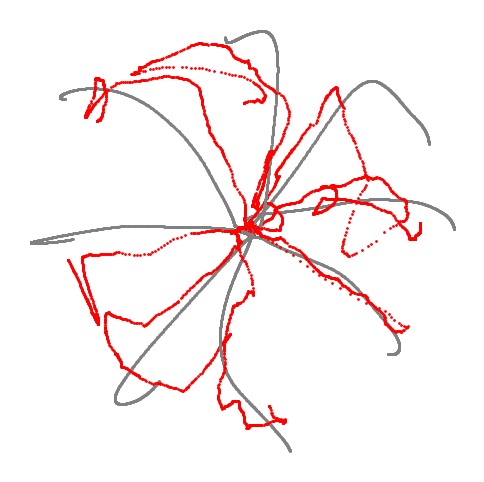

In [11]:
true = data["trajectory"]["true"]
pred = data["trajectory"]["prediction"]
plt.figure(figsize=(6, 6))
for i in range(8):
    plt.scatter(true[i][:, 0], true[i][:, 1], s=1, c="gray")
    plt.scatter(pred[i][:, 0], pred[i][:, 1], s=1, c="red")
plt.axis("off")